In [ ]:
import pandas as pd
import numpy as np
import pickle

# -------------------------------------
# LOAD THE ORIGINAL day.csv FILE
# -------------------------------------
df = pd.read_csv("/content/drive/MyDrive/Project/day.csv")

# Save the actual values before dropping
actual_cnt = df['cnt'].copy()

# -------------------------------------
# PREPROCESS EXACTLY THE SAME AS TRAINING
# -------------------------------------

# Drop columns not used in training
df = df.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)

# One-hot encoding (same as during training)
df = pd.get_dummies(
    df,
    columns=['season', 'mnth', 'weekday', 'weathersit'],
    drop_first=True
)

# Load training file to match columns
train_df = pd.read_csv("/content/drive/MyDrive/Project/preprocessed_day.csv")
required_cols = train_df.drop('cnt', axis=1).columns

# Add missing columns in test dataset
for col in required_cols:
    if col not in df.columns:
        df[col] = 0

# Ensure same column order
df = df[required_cols]

# -------------------------------------
# LOAD SCALER AND APPLY SCALING
# -------------------------------------
scaler = pickle.load(open("/content/drive/MyDrive/Project/scaler.pkl", "rb"))
num_cols = ['temp', 'atemp', 'hum', 'windspeed']
df[num_cols] = scaler.transform(df[num_cols])

# -------------------------------------
# LOAD YOUR BEST MODEL
# -------------------------------------
model = pickle.load(open("/content/drive/MyDrive/Project/Models/RandomForest.pkl", "rb"))

# -------------------------------------
# PREDICT
# -------------------------------------
predictions = model.predict(df)

# Create final table
results = pd.DataFrame({
    "Actual_cnt": actual_cnt,
    "Predicted_cnt": predictions
})

print(results.head())

# Save result
results.to_csv("Predictions_data.csv", index=False)
print("Saved: Predictions_data.csv")


   Actual_cnt  Predicted_cnt
0         985    1257.850000
1         801    1221.416667
2        1349    1473.333333
3        1562    1550.523333
4        1600    1625.136667
Saved: Predictions_data.csv


In [ ]:
import pandas as pd

results = pd.read_csv("/content/drive/MyDrive/Project/Predictions_data.csv")

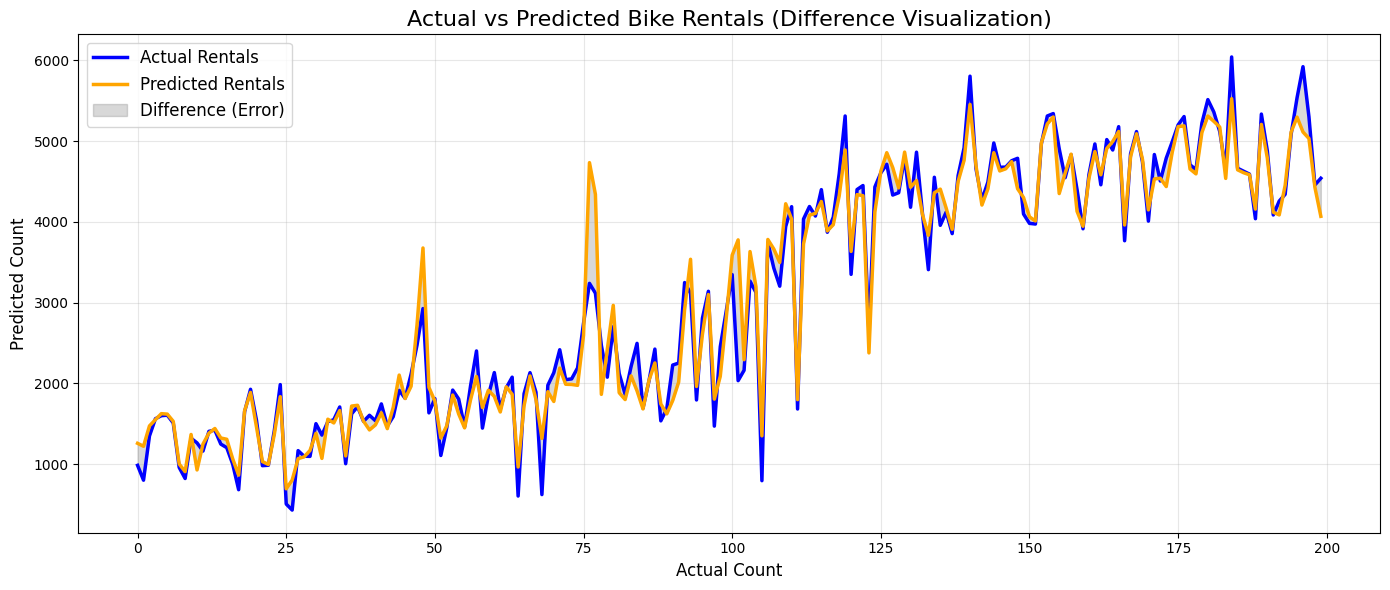

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Take first 200 rows (full dataset will look crowded, adjust as needed)
actual = results['Actual_cnt'].head(200).values
pred = results['Predicted_cnt'].head(200).values
x = np.arange(len(actual))

plt.figure(figsize=(14,6))

# Actual Line
plt.plot(x, actual, label="Actual Rentals", linewidth=2.5, color='blue')

# Predicted Line
plt.plot(x, pred, label="Predicted Rentals", linewidth=2.5, color='orange')

# Shaded area showing difference
plt.fill_between(x, actual, pred, color='gray', alpha=0.3, label='Difference (Error)')

plt.title("Actual vs Predicted Bike Rentals (Difference Visualization)", fontsize=16)
plt.xlabel("Actual Count", fontsize=12)
plt.ylabel("Predicted Count", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
